#  Outlier_Missing_Eda_Feature_Union_Pipeline_Scikit

This workbook  is the first work book of a ML pipeline following chains of activities would be performed!

1. Take sample raw data (Training Sample NOT Test Data ) 
2. Raw Analysis of Describe() 
3. Missing Value of Outlier Treatment 
4. EDA Analysis with Predictive Power Assessment
5. Finally New Feature Creation 
6. Imputing, Scaling,Feature Union Pipeline for Futher Processing
7. Persist Pipeline Apply to a new Dataset

In [1]:
get_ipython().magic(u'matplotlib inline')
import os
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
#sns.set(style="darkgrid")
from IPython.display import display 
import math
import warnings
from scipy.stats import chi2_contingency 

In [2]:
pd.set_option('chained_assignment',None)
warnings.filterwarnings('ignore')

In [3]:
os.chdir('E:\\solution_area\\GREAT_LEARNING\\gl_ft_01_2019\labs_')
from eda import *

### 1. Read Data

In [4]:
var_names =['age','workclass','fnlwgt','education','education_num','marital_status',
'occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week',
'native_country','class']
url ="http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data =pd.read_csv(url,sep=',',header=None,names=var_names)
data.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [5]:
data['y']=data['class'].map(lambda x: 1 if x.strip()=='>50K' else 0)
data =data[var_names[:-1]+['y']] 
data.head(2)
print("Total Nos of Targets={}".format(data['y'].sum()))

Total Nos of Targets=7841


### 2. Train - Test  Division

In [6]:
n_rows =data.shape[0]
# picke 50% sample
percent_train =0.70
n_train = int(percent_train*n_rows)
print(n_train)

22792


In [7]:
def split_data(n_train,data):
    np.random.seed(123)
    perm = np.random.permutation(data.shape[0])
    training_indices = perm[range(0,n_train)]
    test_indices = perm[range(n_train,data.shape[0])]
    train = data.iloc[training_indices,:]
    test = data.iloc[test_indices,:]
    
    return train,test

In [8]:
train_data,test_data=split_data(n_train,data)

### 3. Define Visualization Class

### 4. EDA_Visualization

#### 4.1 EDA_Initialization

- **data**   : pandas dataframe
- **name**   : project or dataset name
- **target** : target variable in the dataset
- **path**   : output path  

In [9]:
# help(EdaOne)

In [10]:
data_eda=EdaOne(train_data,'gl2_demo','y',path='E:\\solution_area\\GREAT_LEARNING\\gl_ft_01_2019\\labs_\\')

#### 4.2  Get Names of Cat and Numeric Vars

In [11]:
num_vars =data_eda.num_vars
print("List of Num Vars={}".format(num_vars))

List of Num Vars=['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [12]:
cat_vars =data_eda.cat_vars
print("List of Cat Vars={}".format(cat_vars))

List of Cat Vars=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


#### 4.2  Calulate Event Rate 

In [13]:
print ("Event Rate for this Data={}".format(round(data_eda.data['y'].sum()/data_eda.data.shape[0],2)))

Event Rate for this Data=0.24


#### 4.3 Check Missing Value Status

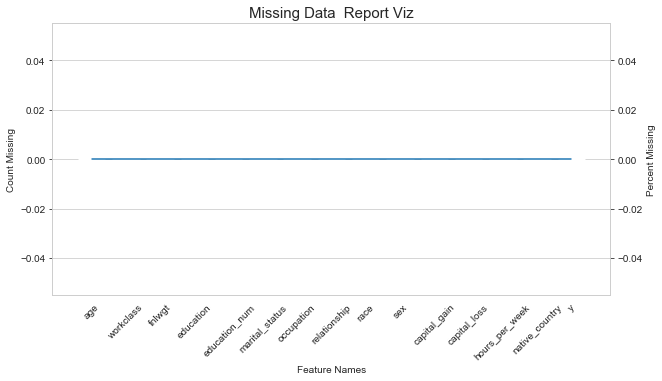

In [14]:
data_eda.get_miss_report(viz=True)

#### 4.4 Basic Outlier Analysis :: Continuous Features

In [15]:
data_eda.get_outlier_report(viz=True)

,Feature_Name,Median,Q1_Value,Q3_Value,Left_Outlier_Nos,Right_Outlier_Nos
0,age,37.0,28.0,48.00,0,107
1,fnlwgt,178747.0,118023.0,236952.25,0,695
2,education_num,10.0,9.0,12.00,839,0
3,capital_gain,0.0,0.0,0.00,0,1923
4,capital_loss,0.0,0.0,0.00,0,1074
5,hours_per_week,40.0,40.0,45.00,3879,2444


#### 4.5 Descriptive Statistics

In [16]:
num_dstat,cat_dstat=data_eda.dstat_report()
display(cat_dstat)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
count,22792,22792,22792,22792,22792,22792,22792,22792
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,15944,7427,10476,2883,9243,19516,15278,20397


In [17]:
display(num_dstat)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,22792.000000,2.279200e+04,22792.000000,22792.000000,22792.000000,22792.000000
mean,38.540935,1.899749e+05,10.067348,1080.085512,88.393296,40.452352
std,13.613051,1.049351e+05,2.564371,7330.104877,405.570858,12.380871
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.180230e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.787470e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369522e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.455435e+06,16.000000,99999.000000,4356.000000,99.000000


#### 4.5 Categorical Feature Visualization

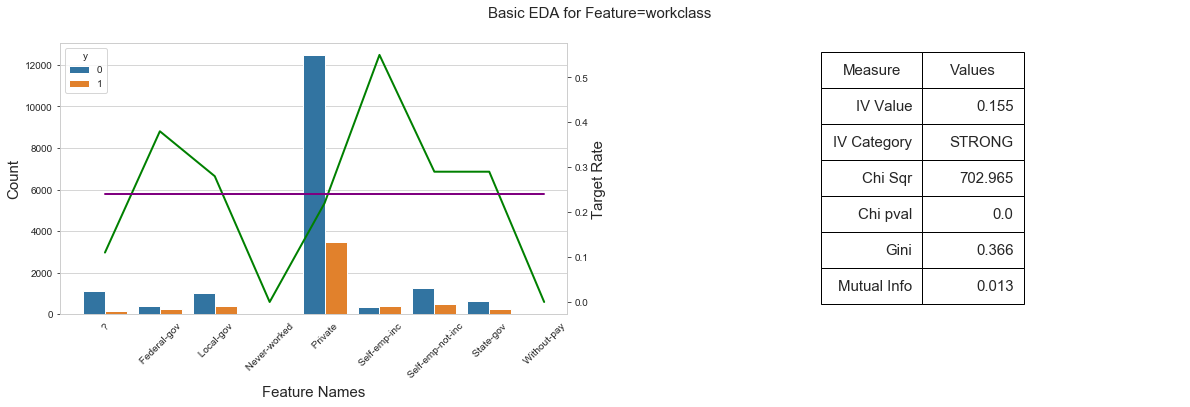

In [18]:
data_eda.cat_one_viz(ftr_name='workclass',munit='nats') #job

#### 4.6 Continuous Feature Visualization

Continuous Data Visualization with **Discretization**.

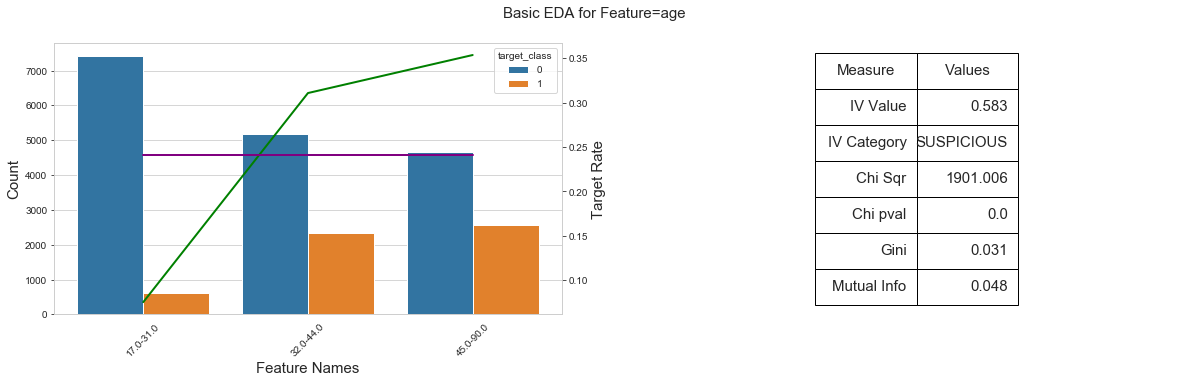

In [19]:
data_eda.conti_monobin_viz(ftr_name='age',bins=20) # More than 5 Bins - bug in countplot 

#### 4.7 Continuous Feature Ovelay Hist

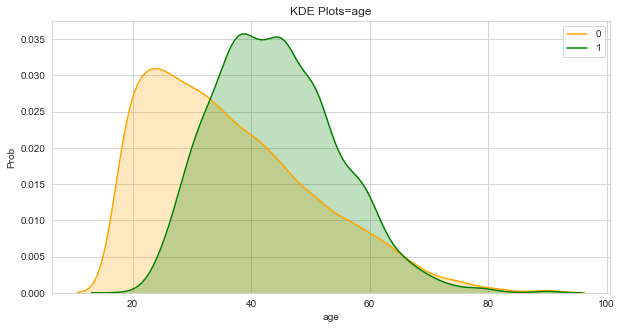

In [20]:
data_eda.kde_conti_dist(ftr_name='age') #duration emp_var_rate

#### 4.8 Grid Plot for Continuous Variables

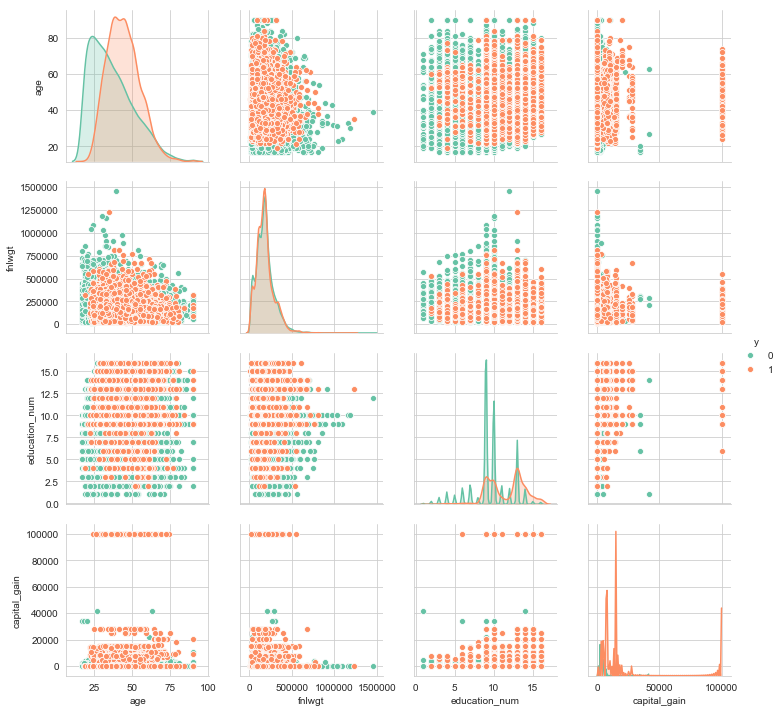

In [21]:
data_eda.pair_conti_plot(ftr_list=['age', 'fnlwgt', 'education_num', 'capital_gain'])

In [22]:
# data_eda.pair_conti_plot(ftr_list=['previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx'])

#### 4.9 Combined Var Ranks

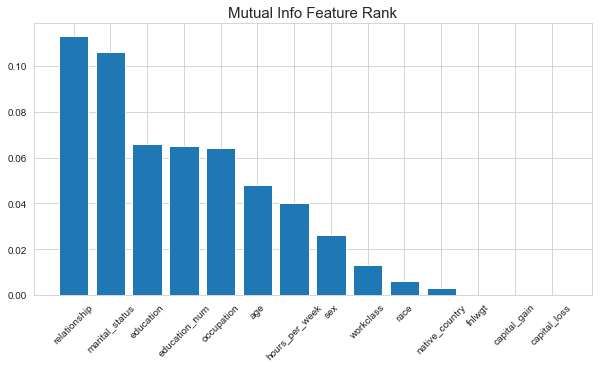

In [23]:
data_eda.var_ranks_plot(output=False,msr_plot='MI')

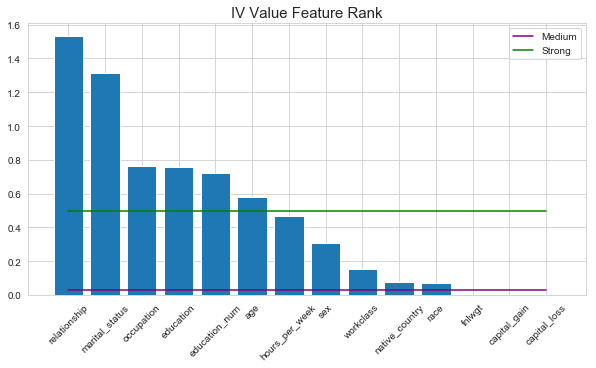

In [24]:
data_eda.var_ranks_plot(output=True,msr_plot='IV')

### 6. Imputation,Scaling and FeatureUnion Pipeline - Toy Example

Example above - we have that series of steps needs to be performed to select the **best features**.These are missing value treatment,scaling (skipped) and encoding ( was inbuilt in the process). The times is now to automate these steps.The k-such steps could be called a **Pipeline** - which special function in **sklearn**. 

In [25]:
#Pipeline Modules
##############################################################
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
# from future_encoders import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
##############################################################
# impute and scaling stuff 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Standard Feature Makers Function
################################################################
######## Model Realted stuff
from sklearn.feature_selection import SelectKBest, SelectPercentile,mutual_info_classif
from sklearn.linear_model import LogisticRegression
######################## Perf Measure####################
from sklearn.metrics import roc_curve,log_loss,f1_score,auc,roc_auc_score


#### 6.1 Imputation, Scaling and Encoding Pipeline - Toy Example

In [26]:
X = pd.DataFrame({'cat': ['a', 'b', 'c'], 'n1': [1, 2, 3] }) 
y=np.array([1,0,0])
print(X)

  cat  n1
0   a   1
1   b   2
2   c   3


In [27]:
num_vars_model=['n1']
cat_vars_model=['cat']

#### Setting the Pipeline

In [28]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars_model),
        ('cat', categorical_transformer, cat_vars_model)])

In [29]:
toy_pipe_1=Pipeline(steps=[('only_raw', preprocessor)])

In [30]:
toy_pipe_1.fit_transform(X)

array([[-1.22474487,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 1.22474487,  0.        ,  0.        ,  1.        ]])

#### 6.2 Imputation, Scaling , Encoding and **Feature Union** Pipeline - Toy Example

###### This class would be used to **Extract(s)** a specific Feature from the list

In [31]:
class ColumnExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_cols = X[self.columns]
        return X_cols

We will pick up a specific feature and will apply to custom function on it and append it back to feature set.

In [32]:
# Adding a 7th power to the function
def f(x):    
    return x**7

In [33]:
#### This Factory Function will wrap into scikit learn pipeline
mtransformer = FunctionTransformer(f, validate=True)

In [34]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars_model),
        ('cat', categorical_transformer, cat_vars_model)])

# Added Line is the new pipeline which would be pick all raw features and  CUSTOM feature 
adder_line = Pipeline([
    ('features', FeatureUnion([('process',preprocessor),
                               ('add_new_var',Pipeline(steps=[
    ('extract', ColumnExtractor(columns=['n1'])),('imputer', SimpleImputer(strategy='median')),
                                   ('scaler', StandardScaler()),('newvar',mtransformer )])
                               )])
    )])    



In [35]:
toy_pipe_2=Pipeline(steps=[('raw_plus_one', adder_line)])

In [36]:
toy_pipe_2.fit_transform(X)

array([[-1.22474487,  1.        ,  0.        ,  0.        , -4.13351394],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 1.22474487,  0.        ,  0.        ,  1.        ,  4.13351394]])

#### 6.3 Imputation, Scaling , Encoding , Feature Union and Select K-Best Pipeline - Toy Example

In [37]:
toy_k_best =Pipeline(steps=[('raw_plus_one', adder_line),('k_best', SelectKBest(mutual_info_classif, k=1))])

In [38]:
toy_k_best.fit(X,y)

Pipeline(memory=None,
     steps=[('raw_plus_one', Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=None,
       transformer_list=[('process', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     st...('k_best', SelectKBest(k=1,
      score_func=<function mutual_info_classif at 0x000000000BCFB1E0>))])

#### Retrieve the K_best from fitted pipeline

In [39]:
clf = toy_k_best.named_steps['k_best']

In [40]:
clf.get_support()

array([False, False, False, False,  True])

#### 6.4 Imputation, Scaling , Encoding , Feature Union , Select K-Best and Model Pipeline - Toy Example

In [41]:
logit_pipe_k_lambda_one =Pipeline(steps=[('raw_plus_one', adder_line),('k_best', SelectKBest(mutual_info_classif, k=1)),
                      ('classifier',LogisticRegression(solver='liblinear',max_iter=2000,penalty='l2',C=1))])

In [42]:
logit_pipe_k_lambda_one.fit(X,y)

Pipeline(memory=None,
     steps=[('raw_plus_one', Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=None,
       transformer_list=[('process', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     st...ty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

In [43]:
clf_1= logit_pipe_k_lambda_one.named_steps['classifier']

In [44]:
print("Fitted Coef is={}".format(clf_1.coef_))
print("Fitted Intercept  is={}".format(clf_1.intercept_))

Fitted Coef is=[[-0.6207702]]
Fitted Intercept  is=[-0.36190486]


### 7. Apply Pipeline  - Bigger Data

In [45]:
X_train=train_data.loc[:, train_data.columns != 'y']
y_train=train_data.loc[:, train_data.columns == 'y']

X_test=test_data.loc[:, train_data.columns != 'y']
y_test=test_data.loc[:, train_data.columns == 'y']


In [46]:
num_vars =data_eda.num_vars
print("List of Num Vars={}".format(num_vars))
cat_vars =data_eda.cat_vars
print("List of Cat Vars={}".format(cat_vars))

List of Num Vars=['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
List of Cat Vars=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


In [47]:
name ='capital_gain'
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)])



adder_line_new = Pipeline([
    ('features', FeatureUnion([('process',preprocessor),
                               ('add_new_var_new',Pipeline(steps=[
    ('extract', ColumnExtractor(columns=[name])),('imputer', SimpleImputer(strategy='median')),
                                   ('scaler', StandardScaler()),('newvar',mtransformer )])
                               )])
    )])    


In [48]:
logit_pipe_k_lambda_big =Pipeline(steps=[('raw_plus_one', adder_line_new),('k_best', SelectKBest(mutual_info_classif, k=10)),
                      ('classifier',LogisticRegression(solver='liblinear',max_iter=2000,penalty='l2',C=1))])

In [49]:
# logit_pipe_k_lambda_big.get_params(deep=True)

In [50]:
logit_pipe_k_lambda_big.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('raw_plus_one', Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=None,
       transformer_list=[('process', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     st...ty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

#### 7.4.1 K=10 ? 

In [51]:
select_step = logit_pipe_k_lambda_big.named_steps['k_best']
select_step.get_support()
# print(np.sum(select_step.get_support()))

array([ True,  True,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [52]:
clf_best= logit_pipe_k_lambda_big.named_steps['classifier']

In [53]:
print("Fitted Coef is={}".format(clf_best.coef_))
print("Fitted Intercept  is={}".format(clf_best.intercept_))

Fitted Coef is=[[ 1.24664844e-10 -4.40589634e-12  1.79881725e-10  8.09567565e-11
   1.23531767e-10 -3.33123374e-11 -1.86559710e-10 -2.83276437e-11
  -9.56474808e-11  1.34677444e-07]]
Fitted Intercept  is=[-3.29448441e-10]


#### 7.4.2 Check Performance

In [54]:
print ("model train score: %.3f" % logit_pipe_k_lambda_big.score(X_train, y_train))

model train score: 0.810


## 7.4.3 Why Pipeline is a great automation!!!

In [55]:
print("model test score: %.3f" % logit_pipe_k_lambda_big.score(X_test, y_test))

model test score: 0.808


### 8.Plot ROC

In [56]:
fpr_train, tpr_train, thr_train=roc_curve(y_train,logit_pipe_k_lambda_big.predict_proba(X_train)[:,1:])
fpr_test,tpr_test, thr_test= roc_curve(y_test,logit_pipe_k_lambda_big.predict_proba(X_test)[:,1:])
auc_train = auc(fpr_train,tpr_train)
auc_test =auc(fpr_test,tpr_test)

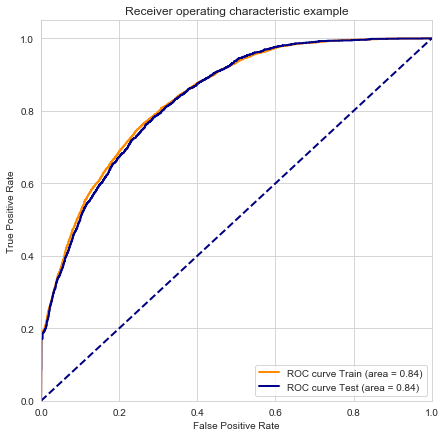

In [57]:
lw=2
f,ax =plt.subplots(1,1,figsize=(7,7))
ax.plot(fpr_train, tpr_train, color='darkorange',lw=lw, label='ROC curve Train (area = %0.2f)' %auc_train)
ax.plot(fpr_test, tpr_test, color='darkblue',lw=lw, label='ROC curve Test (area = %0.2f)' %auc_test)
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
ax.legend(loc="lower right")
plt.show()